In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error as mae, max_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [9]:
#path = 'NonCropShare/'
path = ''
datac = pd.io.stata.read_stata(path+'joinedDataCambodia.dta')
datav = pd.io.stata.read_stata(path+'joinedDataVietnam.dta')

In [10]:
# Calculate landscape production
datac['landscapeProduction'] = datac['gameScores'] - datac['sumSubsidies']
datav['landscapeProduction'] = datav['gameScores'] - datav['sumSubsidies']

# Calculate cooperative outcome
datac['cooperativeOutcome'] = (36 - datac['numHS']) / 36
datav['cooperativeOutcome'] = (36 - datav['numHS']) / 36

# Calculate cooperative production
datac['cooperativeProduction'] = (datac['landscapeProduction'] * datac['cooperativeOutcome']) / 360
datav['cooperativeProduction'] = (datav['landscapeProduction'] * datav['cooperativeOutcome']) / 360

In [11]:
# Drop practice game records
datac.drop(datac[datac['Game']=='GP'].index, inplace=True)
datav.drop(datav[datav['Game']=='GP'].index, inplace=True)

In [12]:
# Sort data
datac.sort_values(by=['Session', 'GameOrder', 'Round'], inplace=True)
datav.sort_values(by=['Session', 'GameOrder', 'Round'], inplace=True)

In [13]:
# create column for fractional change from previous choices
choiceCellX = ['choiceCell'+str(i) for i in range(1, 37)]
datac['changeChoice'] = (datac[choiceCellX].diff()!=0).sum(axis=1)
datac.loc[datac.Round==1, 'changeChoice'] = 0
datac['changeChoiceFrac'] = datac['changeChoice'] / 36

In [53]:
print(datac['Session'].unique())
datac['SessionOrder'] = datac['Session'].rank(method='dense', ascending=True).astype(int)
datac[['Session', 'SessionOrder']]

[201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 227 231 232 233 234 235 236 237 238 239 240 241
 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259
 260 261 262 263 264 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423 426 427 428 431 433 434 435
 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453
 454 455 456 457 458 460 461 463 464]


,Session,SessionOrder
0,201,1
1,201,1
2,201,1
3,201,1
4,201,1
...,...,...
3739,464,117
3740,464,117
3741,464,117
3742,464,117


In [48]:
datac.reset_index(inplace=True)

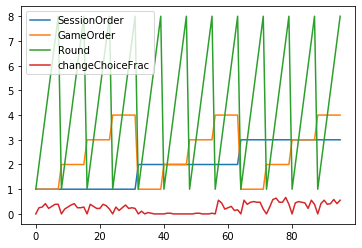

In [54]:
datac[datac['SessionOrder']<=3][['SessionOrder', 'GameOrder', 'Round', 'changeChoiceFrac']].plot()

## Trend for a given game and round

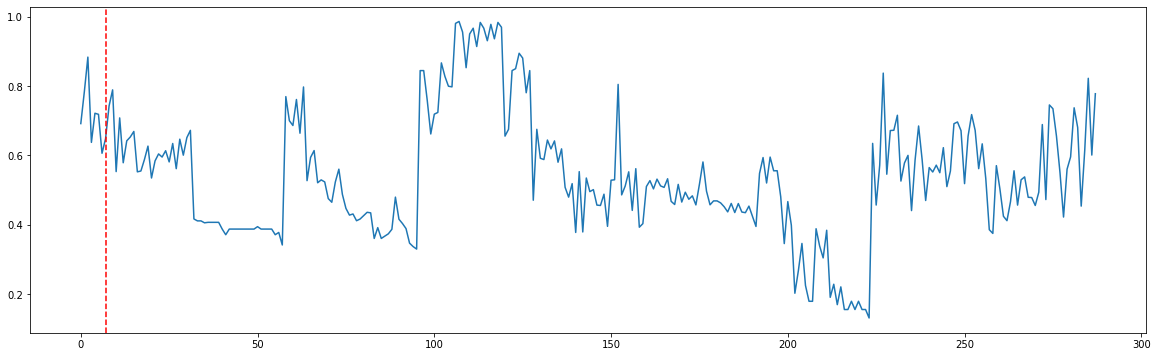

In [69]:
ax = datac[datac['SessionOrder']<10]['cooperativeProduction'].plot(figsize=(20,6))
ax.axvline(7, color='r', linestyle='--')
#datac[datac['SessionOrder']<40]['cooperativeOutcome'].plot(figsize=(20,6), ax=ax)

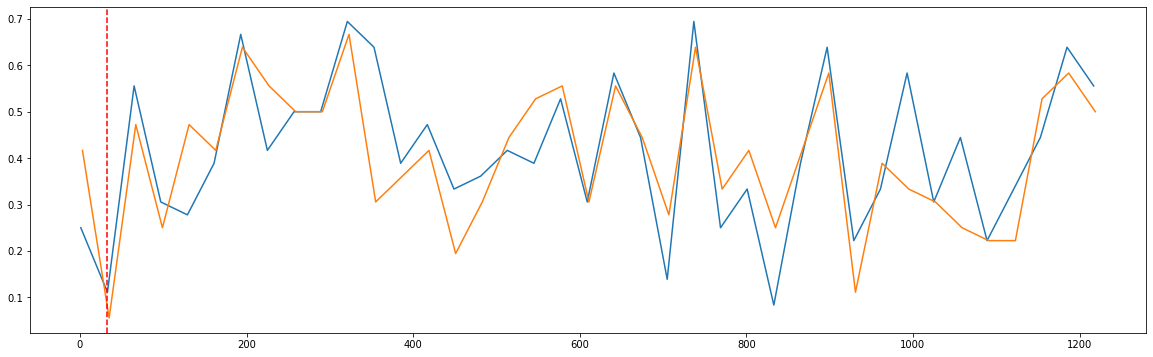

In [85]:
ax = datac[(datac['SessionOrder']<40)&(datac['GameOrder']==1)&(datac['Round']==2)]['changeChoiceFrac'].plot(figsize=(20,6))
ax = datac[(datac['SessionOrder']<40)&(datac['GameOrder']==1)&(datac['Round']==4)]['changeChoiceFrac'].plot(figsize=(20,6))
#ax = datac[(datac['SessionOrder']<40)&(datac['GameOrder']==1)&(datac['Round']==4)]['changeChoiceFrac'].plot(figsize=(20,6))
#ax = datac[(datac['SessionOrder']<40)&(datac['GameOrder']==1)&(datac['Round']==5)]['changeChoiceFrac'].plot(figsize=(20,6))
ax.axvline(32, color='r', linestyle='--')

#### Same rounds of different games: Quick Look 1

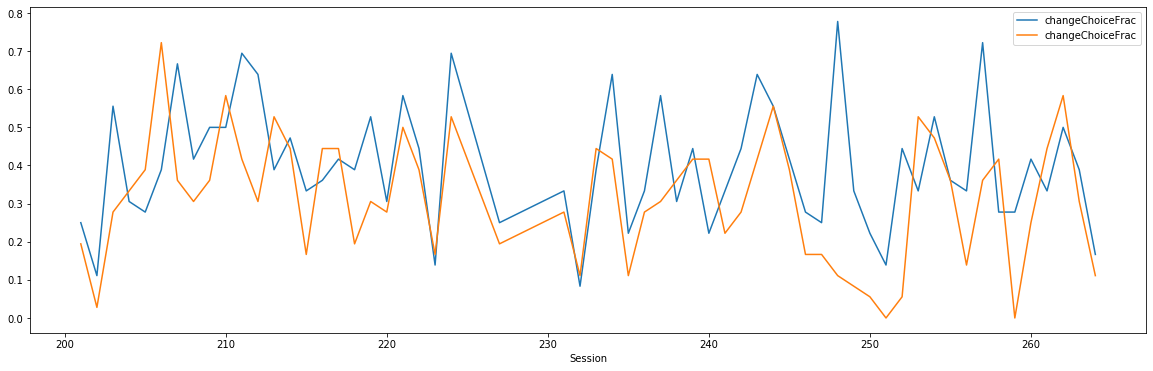

In [51]:
ax = datac[(datac['Round']==2) & (datac['GameOrder']==1) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line')
datac[(datac['Round']==2) & (datac['GameOrder']==2) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line', ax=ax)

#### Same rounds of different games: Quick Look 2

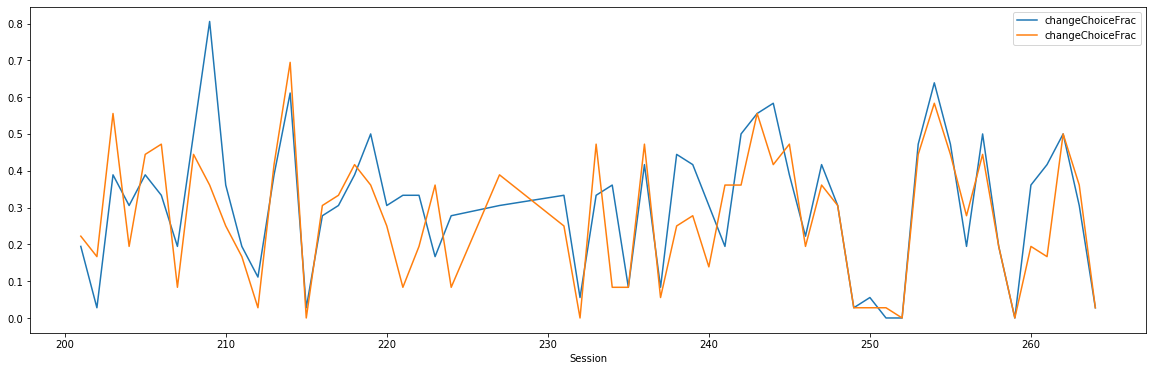

In [52]:
ax = datac[(datac['Round']==8) & (datac['GameOrder']==3) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line')
datac[(datac['Round']==8) & (datac['GameOrder']==4) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line', ax=ax)

#### Different rounds of same game: Quick Look 1

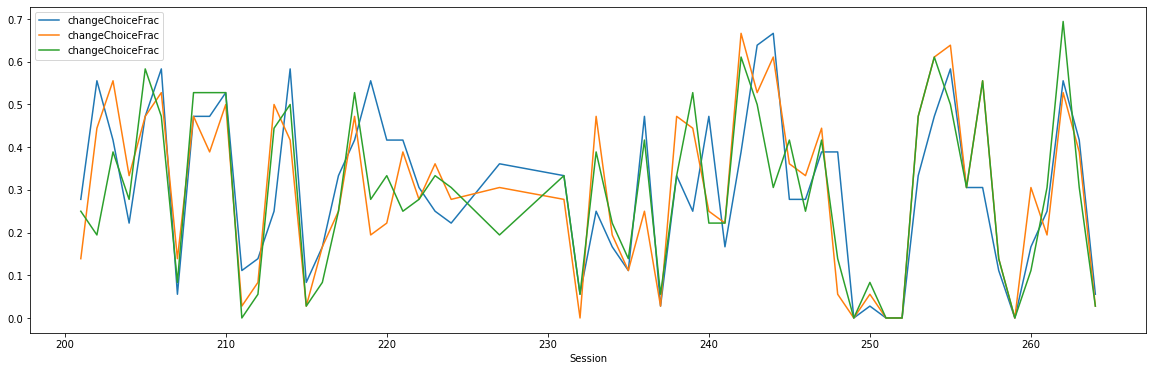

In [66]:
ax = datac[(datac['Round']==2) & (datac['GameOrder']==4) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line')
datac[(datac['Round']==3) & (datac['GameOrder']==4) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line', ax=ax)
datac[(datac['Round']==4) & (datac['GameOrder']==4) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line', ax=ax)

#### Different rounds of same game: Quick Look 2

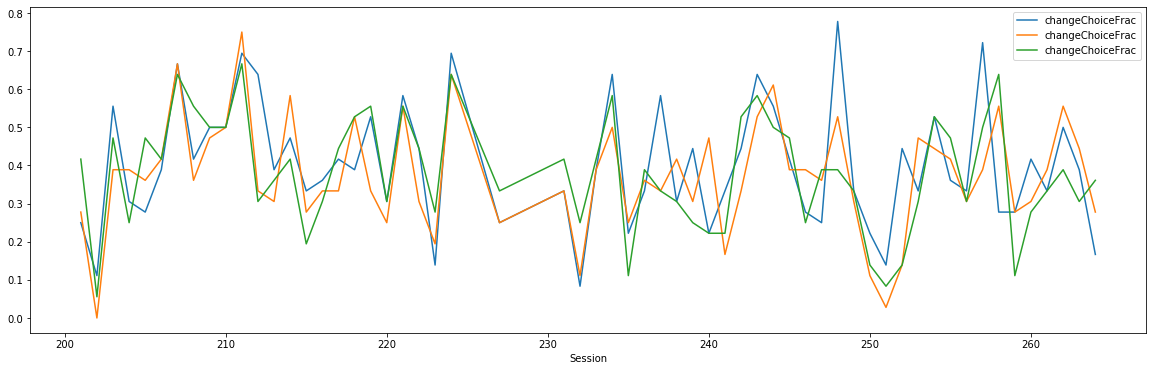

In [69]:
ax = datac[(datac['Round']==2) & (datac['GameOrder']==1) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line')
datac[(datac['Round']==3) & (datac['GameOrder']==1) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line', ax=ax)
datac[(datac['Round']==4) & (datac['GameOrder']==1) & (datac['Session']<265)].plot(x='Session', y='changeChoiceFrac', figsize=(20,6), kind='line', ax=ax)

#### For a given session

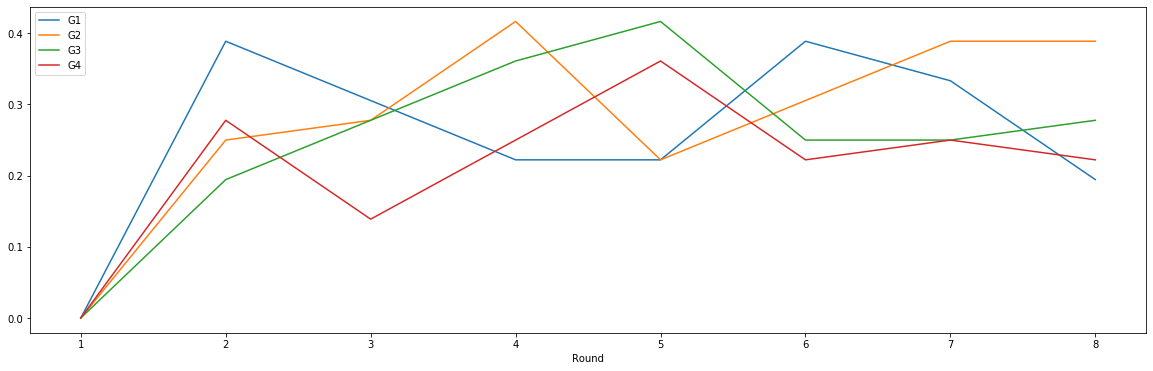

In [68]:
ax1 = datac[(datac['Session']==201) & (datac['Game']=='G1')].plot(x='Round', y='changeChoiceFrac', figsize=(20,6), label='G1')
datac[(datac['Session']==201) & (datac['Game']=='G2')].plot(x='Round', y='changeChoiceFrac', figsize=(20,6), ax=ax1, label='G2')
datac[(datac['Session']==201) & (datac['Game']=='G3')].plot(x='Round', y='changeChoiceFrac', figsize=(20,6), ax=ax1, label='G3')
datac[(datac['Session']==201) & (datac['Game']=='G4')].plot(x='Round', y='changeChoiceFrac', figsize=(20,6), ax=ax1, label='G4')

#### Get average over all games in a session

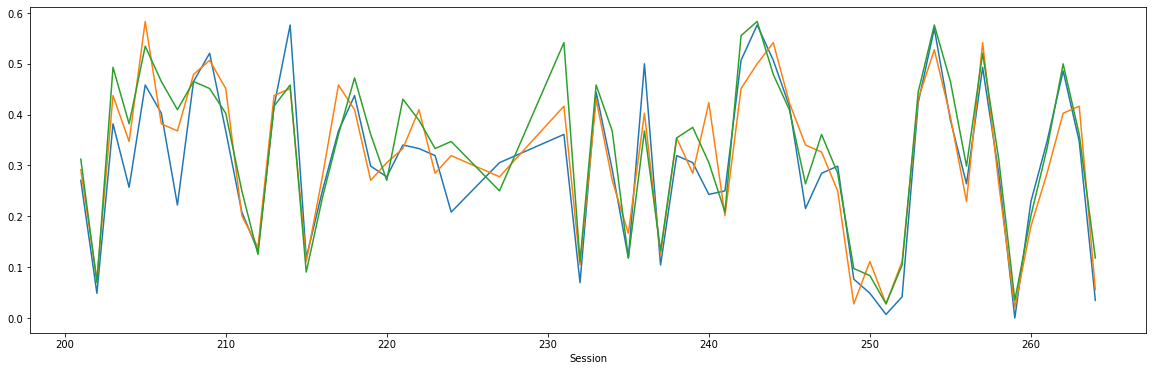

In [78]:
ax = datac[(datac['Round']==8) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(figsize=(20,6))
datac[(datac['Round']==6) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))
datac[(datac['Round']==4) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))

#### Get average of all rounds in a game 

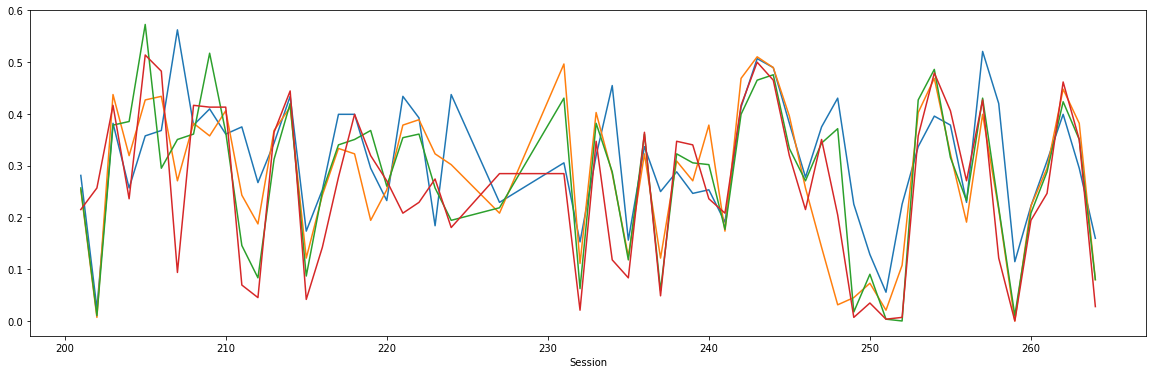

In [81]:
ax = datac[(datac['GameOrder']==1) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(figsize=(20,6))
datac[(datac['GameOrder']==2) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))
datac[(datac['GameOrder']==3) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))
datac[(datac['GameOrder']==4) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))

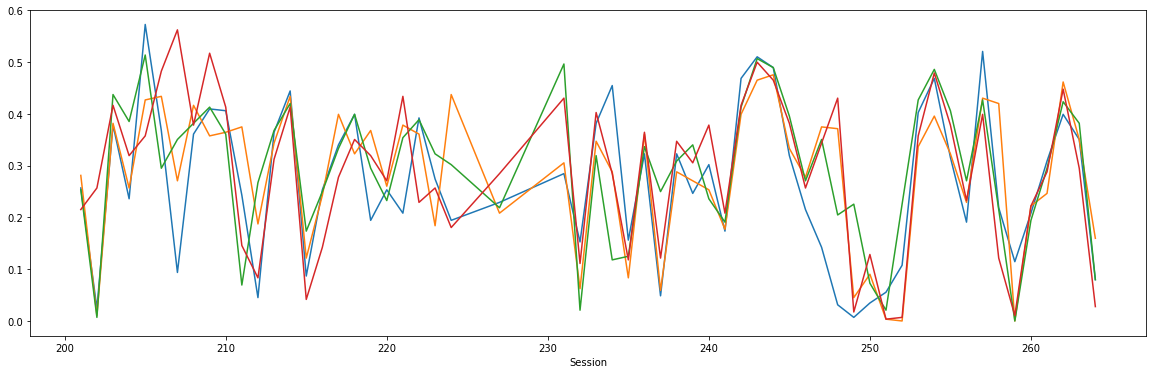

In [82]:
ax = datac[(datac['Game']=='G1') & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(figsize=(20,6))
datac[(datac['Game']=='G2') & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))
datac[(datac['Game']=='G3') & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))
datac[(datac['Game']=='G4') & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'].plot(ax=ax, figsize=(20,6))

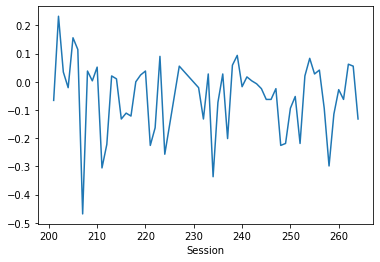

In [88]:
(datac[(datac['GameOrder']==4) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac'] - datac[(datac['GameOrder']==1) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']).plot()

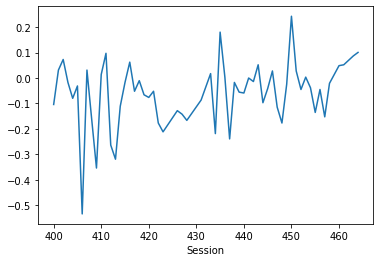

In [90]:
(datac[(datac['GameOrder']==4) & (datac['Session']>265)].groupby('Session').mean()['changeChoiceFrac'] - datac[(datac['GameOrder']==1) & (datac['Session']>265)].groupby('Session').mean()['changeChoiceFrac']).plot()

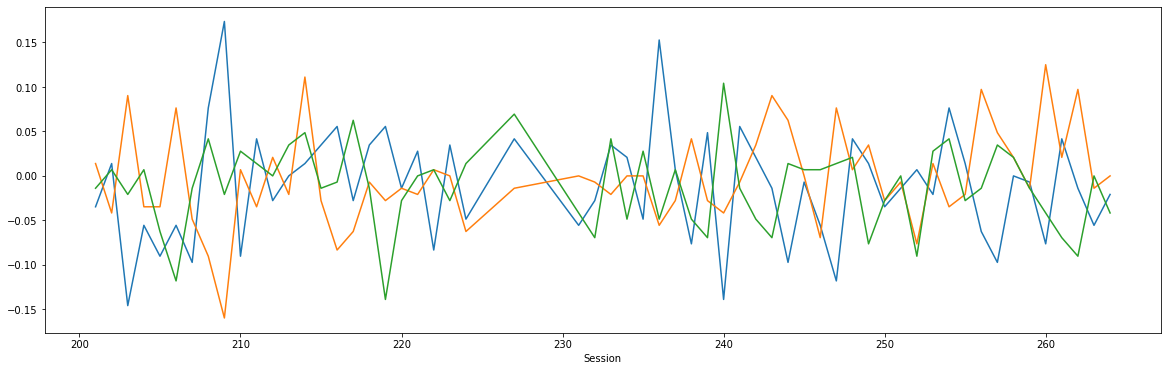

In [96]:
ax = (datac[(datac['Round']==8) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']-datac[(datac['Round']==7) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']).plot(figsize=(20,6))
(datac[(datac['Round']==7) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']-datac[(datac['Round']==6) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']).plot(ax=ax, figsize=(20,6))
(datac[(datac['Round']==6) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']-datac[(datac['Round']==5) & (datac['Session']<265)].groupby('Session').mean()['changeChoiceFrac']).plot(ax=ax, figsize=(20,6))